In [18]:
import numpy as np
import pandas as pd
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from lib.mmsbm import MMSBM
from scipy.stats import norm
from sklearn.preprocessing import normalize

In [19]:
# Constants
train = "train_cor_cl.csv"
test = "test_cor_cl.csv"
sampling = 6
# Number of groups of users
k = 3
# Number of groups of items
l = 3
# Iterations
# To plateau the coefficients the minimum is 500
iterations = 600

In [20]:
mmsbm = MMSBM(
    train_set=train,
    test_set=test,
    user_groups=k,
    item_groups=l,
    iterations=iterations,
    sampling=sampling,
    seed=12,
    notebook=True
)
return_dict = mmsbm.process()
s_prs, accuracy, mae, s2, s2pond, rat, lkh, theta, eta = mmsbm.postprocess(return_dict)

INFO:MMSBM:Running 6 runs of 600 iterations.
INFO:MMSBM:Done 6 runs in 5.83 minutes.
INFO:MMSBM:We had an accuracy of 0.34861809045226133, a MAE of 0.6788107202680067 and s2 and weighted s2 of 5142 and 4515.


In [21]:
logger = logging.getLogger()
logger.setLevel(level=logging.INFO)

In [5]:
# broken
"""
temp = np.array(s_prs["1"])
ev = pd.DataFrame(temp.reshape((temp.shape[0], temp.shape[1] * temp.shape[2] * temp.shape[3])))
ev["iteration"] = ev.index + 1
ev = ev.melt(id_vars="iteration", value_vars=list(ev.columns[:-1]))
g = sns.lineplot(x="iteration", y="value", hue="variable", data=ev)
g.set(xlabel='Iteration', ylabel='Coefficients')
g.legend_.remove()
"""

'\ntemp = np.array(s_prs["1"])\nev = pd.DataFrame(temp.reshape((temp.shape[0], temp.shape[1] * temp.shape[2] * temp.shape[3])))\nev["iteration"] = ev.index + 1\nev = ev.melt(id_vars="iteration", value_vars=list(ev.columns[:-1]))\ng = sns.lineplot(x="iteration", y="value", hue="variable", data=ev)\ng.set(xlabel=\'Iteration\', ylabel=\'Coefficients\')\ng.legend_.remove()\n'

<AxesSubplot:>

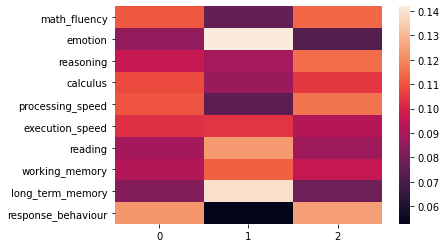

In [22]:
# Groups of tests
neta = eta.div(eta.sum(axis=0))
sns.heatmap(neta)

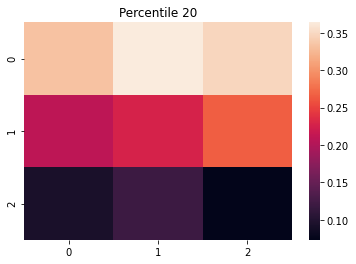

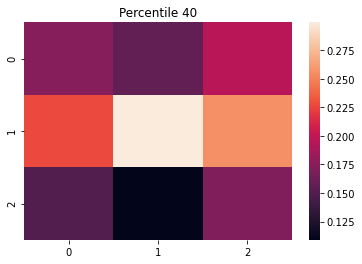

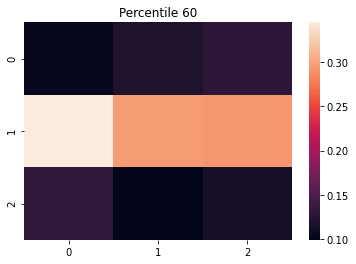

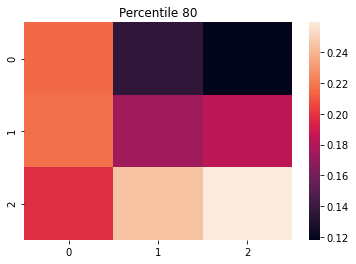

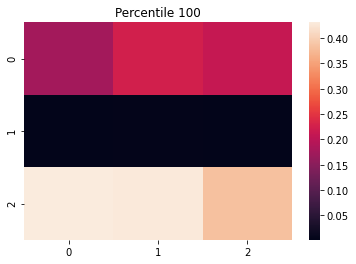

In [23]:
# Probability distributions
for i, prs in s_prs.items():
    ax = plt.axes()
    sns.heatmap(prs, ax = ax)

    ax.set_title(f"Percentile {int(i) * 20}")
    plt.show()

<AxesSubplot:>

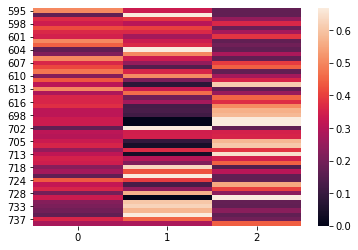

In [24]:
# Observations belonging to groups
sns.heatmap(theta.iloc[:50, :])

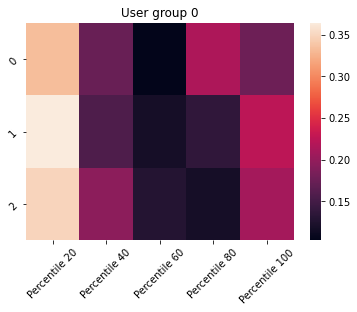

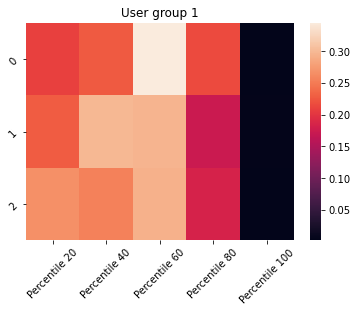

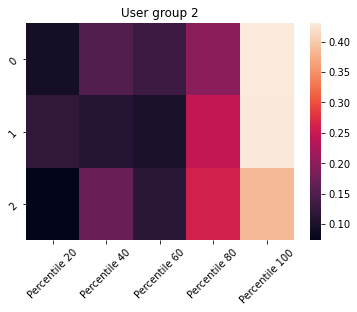

In [25]:
# Let's try to understand the groups better
df = pd.concat(s_prs, axis=0).swaplevel()

for i in set(df.index.get_level_values(0)):
    temp = df[df.index.isin([int(i)], level=0)].droplevel(0).transpose()
    ax = plt.axes()
    sns.heatmap(temp, ax = ax)
    ax.set_xticklabels([f"Percentile {int(a) * 20}" for a in s_prs.keys()])
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

    ax.set_title(f"User group {i}")
    plt.show()

coses a fer:
- mirar que les normalitzacions estiguin bé
- venetian blinds test set i accuracy com déu mana
- trobar millors k i l
- 5-fold CV per calcular l'accuracy
- random forest per comparar: tant amb valors reals com amb percentils
- percentil real vs predit per prova

- mirar doctorat industrial